# Simple Linear Regression

$$
\begin{align*} \Large Y= \beta_0 + \beta_1 X + \epsilon \end{align*} 
$$

Here $\beta_0$ is the intercept term- that is, the expected value of $Y$ when $X=0$, and $\beta_1$ is the slope- the average increase in $Y$ associated with a one unit increase in $X$. The error term is a catch-all for what we miss with this simple model; the true relationship is probably not linear, there may be other variables that cause variation in $Y$, and there may be measurement error. **We typically assume that the error term is independent of $X$**.The above equation is called population regression equation.

The unknown coefficients $\beta_0$ and $\beta_1$ in the population regression line is unknown. We estimate these unknown coefficients using the principle of least squares.

$$
\begin{align*}\Large \hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{S_{xy}}{S_{xx}}\end{align*}
$$

$$
\begin{align*}\Large \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}\end{align*}
$$

- Coefficients represents how much is the expected change when we have 1 unit change in the feature.

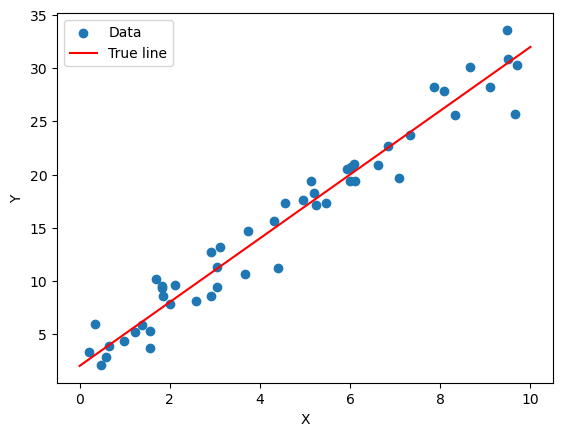

Manual OLS estimates:
beta_0_hat: 2.1933785489377726
beta_1_hat: 2.9553132007706204


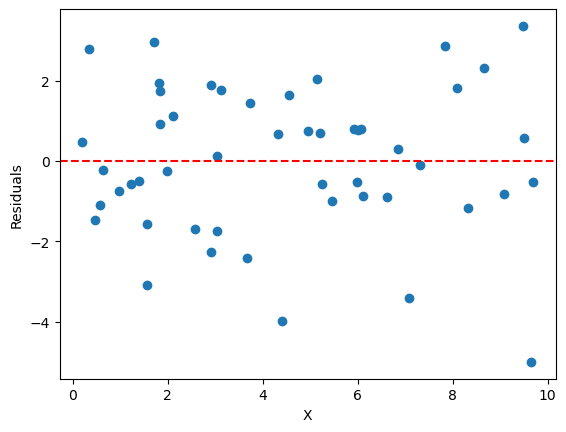

Sklearn estimates:
Intercept: 2.1933785489377673
Slope: 2.9553132007706218
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.35e-34
Time:                        01:58:03   Log-Likelihood:                -100.74
No. Observations:                  50   AIC:                             205.5
Df Residuals:                      48   BIC:                             209.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [1]:
# Step 0: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# -----------------------------
# Step 1: Generate synthetic data
# -----------------------------
np.random.seed(42)  # for reproducibility

# Population parameters
beta_0 = 2
beta_1 = 3
n = 50  # number of samples

# Generate feature X
X = np.random.uniform(0, 10, n)

# Generate error term
epsilon = np.random.normal(0, 2, n)  # mean 0, std 2

# Generate response Y
Y = beta_0 + beta_1 * X + epsilon

# Optional: scatter plot with true line
plt.scatter(X, Y, label='Data')
plt.plot([0, 10], [beta_0, beta_0 + beta_1*10], color='red', label='True line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# -----------------------------
# Step 2: Manual OLS estimation
# -----------------------------
x_mean = np.mean(X)
y_mean = np.mean(Y)

S_xx = np.sum((X - x_mean)**2)
S_xy = np.sum((X - x_mean)*(Y - y_mean))

# Estimated coefficients
beta_1_hat = S_xy / S_xx
beta_0_hat = y_mean - beta_1_hat * x_mean

print("Manual OLS estimates:")
print("beta_0_hat:", beta_0_hat)
print("beta_1_hat:", beta_1_hat)

# Fitted values and residuals
Y_hat = beta_0_hat + beta_1_hat * X
residuals = Y - Y_hat

# Optional: residual plot
plt.scatter(X, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.show()

# -----------------------------
# Step 3: Library implementation
# -----------------------------
# Using sklearn
X_reshaped = X.reshape(-1, 1)  # sklearn expects 2D array
model = LinearRegression()
model.fit(X_reshaped, Y)

print("Sklearn estimates:")
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

# Using statsmodels (provides more statistics)
X_sm = sm.add_constant(X)  # adds intercept term
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())


# Standard Errors of Estimates

The least squares coefficient estimates are unbiased. This means that if we estimate $\beta_0$ and $\beta_1$ on the basis of a particular data set, then our estimates won't be equal to $\beta_0$ and $\beta_1$. But if we could average the estimates obtained would be spot on.

How accurate are the estimates? We answer this question by computing the standard errors of the estimates.

$$
\begin{align*}\Large SE(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}]\end{align*}
$$

$$
\begin{align*}\Large SE(\hat{\beta_0})^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar{x})^2}\end{align*}
$$

where $\sigma^2 = Var(\epsilon)$

These formulas to be strictly valid, we need to assume that the errors for each observation are uncorrelated with common variance $\sigma^2$. We see that $SE(\hat{\beta_0})$ would be the same as $SE(\hat{\mu})$ if $\bar{x}$ were zero.$SE(\hat{\beta_1})$ is smaller when $x_i$ are more spread out; intuitively we have more leverage to estimate a slope when this is the case. In general, $\sigma^2$ is not known, but can be estimated from the data. The estimate of $\sigma$ is known as residual standard error, and is given by the formula;
$RSE = \sqrt{RSS/(n-2)}$.

**pvalue** : probability of obtaining the observed results given the null hypothesis

In [2]:
# Step 0: Imports (if not already done)
import numpy as np
from scipy import stats

# -----------------------------
# Step 1: Residuals and RSS
# -----------------------------
# Already have residuals from previous manual OLS
RSS = np.sum(residuals**2)  # Residual Sum of Squares
n = len(X)

# Residual standard error (estimate of sigma)
RSE = np.sqrt(RSS / (n - 2))
print("Residual Standard Error (RSE):", RSE)

# -----------------------------
# Step 2: Standard Errors of beta_0_hat and beta_1_hat
# -----------------------------
S_xx = np.sum((X - np.mean(X))**2)

SE_beta_1 = RSE / np.sqrt(S_xx)
SE_beta_0 = RSE * np.sqrt(1/n + (np.mean(X)**2)/S_xx)

print("Standard error of beta_1_hat:", SE_beta_1)
print("Standard error of beta_0_hat:", SE_beta_0)

# -----------------------------
# Step 3: t-statistics
# -----------------------------
t_beta_1 = beta_1_hat / SE_beta_1
t_beta_0 = beta_0_hat / SE_beta_0

print("t-statistic for beta_1:", t_beta_1)
print("t-statistic for beta_0:", t_beta_0)

# -----------------------------
# Step 4: p-values (two-tailed)
# -----------------------------
df = n - 2  # degrees of freedom for simple linear regression

p_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_beta_1), df))
p_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_beta_0), df))

print("p-value for beta_1:", p_beta_1)
print("p-value for beta_0:", p_beta_0)

# -----------------------------
# Step 5: Compare with statsmodels output
# -----------------------------
import statsmodels.api as sm
X_sm = sm.add_constant(X)
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())

Residual Standard Error (RSE): 1.851880962414395
Standard error of beta_1_hat: 0.09157833418658523
Standard error of beta_0_hat: 0.48513406423868727
t-statistic for beta_1: 32.27087746266875
t-statistic for beta_0: 4.521180248143994
p-value for beta_1: 0.0
p-value for beta_0: 4.028650715981463e-05
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1041.
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           3.35e-34
Time:                        02:00:52   Log-Likelihood:                -100.74
No. Observations:                  50   AIC:                             205.5
Df Residuals:                      48   BIC:                             209.3
Df Model:                           1                                

# Hypothesis Testing

Standard errors can be used to perform hypothesis tests on the coefficients. The most common hypothesis test involves testing the null hypothesis of

$H_0$ : There is no relationship between $X$ and $Y$ ($\beta_1 = 0$)

$H_1$ : There is some relationship between $X$ and $Y$ ($\beta_1 != 0$)

To test the null hypothesis, we need to determine
whether $\hat{\beta_1}$, our estimate for β1, is sufficiently far from zero that we can
be confident that β1 is non-zero. How far is far enough? This of course
depends on the accuracy of $\hat{\beta_1}$ —that is, it depends on $SE(\hat{\beta_1})$. If $SE(\hat{\beta_1})$ is
small, then even relatively small values of $\hat{\beta_1}$ may provide strong evidence that β1 = 0, and hence that there is a relationship between X and Y . In contrast, if $SE(\hat{\beta_1})$ is large, then $\hat{\beta_1}$ must be large in absolute value in order
for us to reject the null hypothesis. In practice, we compute a t-statistic, t-statistic given by;

$$
\begin{align*}\Large t = \frac{\hat{\beta_1}-0}{SE(\hat{\beta_1})}\end{align*}
$$

This measure the number of standard deviations that beta_1_hat is away from 0. If there really is no relationship between x and y, then we expect that will have a t distribution with n-2 degrees of freedom. The t distribution has a bell shape and for values of n greater than approximately 30 it is quite similar to the normal distribution.

We interpret the p value as follows: a small p-value indicates that it is unlikely to observe such a substantial association between the predictor and the response due to chance, in the absence of any real association between the predictor and the response. Hence, if we see a small p-value, then we can infer that there is an association between predictor and the response. We reject the null hypothesis - that is , we declare a relationship to exist between x and y- if the p-value is small enough.

# Assessing the accuracy of the Model

The quality of a linear regression fit is typically assessed using two related quantities; the residual standard error(RSE) and the $R^2$ statistic.
Due to the presence of the error term, even if we knew the true regression line, we would not be able to perfectly predict Y from X. The RSE is an estimate of the standard deviation of the $\epsilon$. Roughly speaking, it is the average amount that the response will deviate from the true regression line. It is computed using the formua;

$$
\begin{align*}\Large RSS = \sqrt{\frac{1}{n-2}RSE} = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n} (y_i-\hat{y_i})^2}\end{align*}
$$

# R2 Statistic

RSE provides an absolute measure of lack of fit of the model. But sicne it is measured in the units of y, it is not always clear what constitutes a good RSE. The $R^2$ statistic takes the form of a proportion- the proportion of variance explained - and so it always takes on a value between 0 and 1 and is independent of the scale of y. 

$$
\begin{align*}\Large R^2 = \frac{TSS-RSS}{TSS} = 1- \frac{RSS}{TSS}\end{align*}
$$

where $TSS = \sum(y_i-\bar{y})^2$ is the total sum of squares and RSS is defined. TSS measures the total variance in the response y, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. R2 measures the proportion of variability in y that can be explained using x.

# Correlation and Covariance

$$
\begin{align*}\Large Cor(X,Y) = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})^2 \sum(y_i-\bar{y})^2}}\end{align*}
$$

$$
\begin{equation*}\Large cov(X, Y) = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{N}\end{equation*}
$$

$$
\begin{equation*}\Large r = \frac{cov(X, Y)}{\sqrt{var(X) \cdot var(Y)}}\end{equation*}
$$

# Multiple Linear Regression - Matrix Formulation

https://online.stat.psu.edu/stat462/node/132/

$$
\begin{align*}\large X^{'}X=\begin{bmatrix} 1 & 1 & \cdots & 1\\  x_1 & x_2 & \cdots & x_n \end{bmatrix}\begin{bmatrix} 1 & x_1\\  1 & x_2\\  \vdots &  x_n\\   1&    \end{bmatrix}=\begin{bmatrix} n & \sum_{i=1}^{n}x_i \\  \sum_{i=1}^{n}x_i  & \sum_{i=1}^{n}x_{i}^{2} \end{bmatrix}\end{align*}
$$

$$
\begin{align*}\large b=\begin{bmatrix} b_0\\  b_1\\  \vdots\\  b_{p-1} \end{bmatrix}=(X^{'}X)^{-1}X^{'}Y\end{align*}
$$

In [3]:
import numpy as np

# -----------------------------
# Step 0: Synthetic data
# -----------------------------
np.random.seed(42)
n = 50
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 1.5, n)
Y = 1 + 2*X1 + 3*X2 + epsilon  # true coefficients: b0=1, b1=2, b2=3

# -----------------------------
# Step 1: Construct design matrix
# -----------------------------
X = np.column_stack((np.ones(n), X1, X2))  # add intercept column

# -----------------------------
# Step 2: Compute coefficients manually
# -----------------------------
XtX = X.T @ X          # X'X
XtY = X.T @ Y          # X'Y
b_hat = np.linalg.inv(XtX) @ XtY  # (X'X)^-1 X'Y

print("Estimated coefficients (manual matrix solution):")
print("b0, b1, b2 =", b_hat)

# -----------------------------
# Step 3: Compare with library
# -----------------------------
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.column_stack((X1, X2)), Y)  # sklearn adds intercept automatically
print("Sklearn estimates:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Estimated coefficients (manual matrix solution):
b0, b1, b2 = [2.04263922 1.80059114 2.94957677]
Sklearn estimates:
Intercept: 2.0426392177796036
Coefficients: [1.80059114 2.94957677]


# F - test in regression analysis 
When we perform multiple linear regression, we usually are interested in answering few important question.

- Is at least one of the predictors $X_1,X_2,...,X_p$ useful in predicting the response?
- Do all the predictors help to explain $Y$, or is only a subset of the predictors useful?
- How well does the model fit the data?
- Given a set of predictor values, what response value should we predict, and how accurate is our prediction?
- Is there a relationship between the response and predictors?
Recall that in the simple linear regression setting, in order to determine whether there is a relationship between the response and the predictor we can simply check whether $\beta_1=0$. In the multiple linear regression with p predictors, we need to ask whether all of the regression coefficients are zero, ie, whether  $\beta_1 = \beta_2 = ... = \beta_p = 0$. We test the null hypothesis,

$H_o : \beta_1 = \beta_2 = ... = \beta_p = 0$ versus the alternative

$H_a :$ at least one $\beta_j$ is non-zero.

This hypothesis is performed by computing the F-statistic.

$$
\begin{align*}\Large F = \frac{(TSS-RSS)/p}{RSS/(n-p-1}\end{align*}
$$

IF f statistic takes a value close to 1, then we cannot expect any relationship between the response and predictors. Larger the f value higher the the evidence against the null hypothesis.

Sometimes, we want to test that a particular subset of q of the coefficents are zero. In this case we fit two model and compute their respective RSS value(with and without that particular subset). We use the following f-statistic to test the hypothesis.

$$
\begin{align*}\Large F=\frac{\frac{RSS_0 - RSS}{q}}{\frac{RSS}{n-p-1}}\end{align*}
$$

The above table provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. It turns out that each of these are exactly equivalent to the F-test that omits that single variable from the model, leaving all the others in(q=1). So it reports the partial effect of adding that variable to the model.
Giving these individual p values for each variable, why do we need to look at the overall F-statistic? After all, it seems likely that if any one of the p-values for the individual variables is very small, then at least one of the predictors is related to the response. However, this logic is flawed, especially when the number of predictors p is large.
lets take p = 100, In this case, we expect to see approximately five small p-values even in the absense of any true association between the predictors and the response. F statistic does not suffer from this problem because it adjusts for the number of predictors. Hence if $H_0$ is true, there is only 5% chance that the F-statistic will result in a p-value below 0.05, regardless of the number of predictors or the number of observations.

In [4]:
import numpy as np
from scipy import stats

# -----------------------------
# Step 0: Synthetic data
# -----------------------------
np.random.seed(42)
n = 50
p = 3  # number of predictors
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
X3 = np.random.uniform(-5, 5, n)
epsilon = np.random.normal(0, 1.5, n)
Y = 1 + 2*X1 + 3*X2 + 0*X3 + epsilon  # X3 has no effect

# Construct design matrix
X = np.column_stack((np.ones(n), X1, X2, X3))  # intercept + predictors

# -----------------------------
# Step 1: Fit model (manual matrix solution)
# -----------------------------
b_hat = np.linalg.inv(X.T @ X) @ (X.T @ Y)
Y_hat = X @ b_hat
residuals = Y - Y_hat

# -----------------------------
# Step 2: Compute TSS, RSS
# -----------------------------
TSS = np.sum((Y - np.mean(Y))**2)
RSS = np.sum(residuals**2)

# -----------------------------
# Step 3: Compute F-statistic
# -----------------------------
F_stat = ((TSS - RSS)/p) / (RSS/(n - p - 1))
p_value = 1 - stats.f.cdf(F_stat, p, n - p - 1)

print("F-statistic:", F_stat)
print("p-value:", p_value)

# -----------------------------
# Step 4: Compare with statsmodels
# -----------------------------
import statsmodels.api as sm
X_sm = sm.add_constant(np.column_stack((X1, X2, X3)))
model_sm = sm.OLS(Y, X_sm).fit()
print(model_sm.summary())


F-statistic: 421.58128000027193
p-value: 1.1102230246251565e-16
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     421.6
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.88e-33
Time:                        02:07:03   Log-Likelihood:                -87.830
No. Observations:                  50   AIC:                             183.7
Df Residuals:                      46   BIC:                             191.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

# Deciding on Important Variables

It is possible that all of the predictors are associated with the response,
but it is more often the case that the response is only related to a subset of
the predictors. The task of determining which predictors are associated with
the response, in order to fit a single model involving only those predictors,
is referred to as variable selection.

To determine which model is best, we use various statistics such as Mallow's Cp, Akaike information criterion (AIC) , Bayesian information criterion(BIC) and adjusted R2.

If we take all the possible combinations of p variables, then $2^p$ subsets are there. Checking these many subsets is practically impossible.

- Forward Selection
- Backward Selection
- Mixed Selection

Recall that in simple regression, R2 is the square of the correlation of the
response and the variable. In multiple linear regression, it turns out that it
equals $Cor(y, \hat{y})^2$, the square of the correlation between the response and the fitted linear model;

It turns out that $R^2$ will always increase when more variables are added to the model, even if those variables are only weakly associated with the response. To solve this issue we have adjusted $R^2$.

$$
\begin{align*}\Large Adjusted R^2 = 1 - \frac{(1-R^2)(N-1)}{N-p-1}\end{align*}
$$

# Confidence Intervals & Prediction Intervals

A confidence interval provides a range of values within which you can expect the true population parameter to fall. 

# Diagnosing Problems in the Regression

- No multicollinearity
- No auto correlation
- No heteroskedasticity.
- Normality
- Exogenity: independent variables are not correlated with the error term.
it arises due to the omission of explanatory variables in the regression.
- linear in parameters

Note : (error terms should be independently (no autocorrelation)  and identically(normality) distributed with constant variance (homoskedastic) and zero mean).

# OSL Violations

1. Multicollinearity
    
    Two or more independent explanatory variables have high correlation among them.if we have this problem, the we cannot estimate the effect of each predictor variable on the dependent variable. multicollinearity increases the variance of the coefficient, this further increases the width of confidence interval. we can combine both variables, or use alternate specifications.
    
    conventional diagnosis is by using vif ( variance inflation factor)
    it assesses how much variance of an estimated regression coefficient increases if predictors in a model are correlated.
    
    $\text{vif}(\beta_1)  = \frac{1}{1-r2}$ , tolerance = 1/vif ,  where r2 refers to the multiple correlation coefficient between x1 and other predictor variables. if vif > 5 then it refers to the presence of multicollinearity.
    
    - warnings signs of multicollinearity:
    - high r2 but insignificant
    - coefficient are opposite signs of their expected.
    - add or remove one fetaure the regression coefcient changes dramatically.
    - add or delete observation the regression coefficients may change substantially.
    
2. Heteroskedasticity : violation of constant variance of error term. 
    - heteroskedasticity refers to situvations where the variance of the residuals is unequal over
    a range of measured values. when running a regression analysis, heteroskedasticity results in an unqual scatter
    of the residuals. This is the violation of the assumption of constant variance.
    - we can analyse this from the graph of residuals.
    - formally we diagnose this using breusch-pagan test.
    h0: the residuals are homoskedastic
    ha: the residuals are heteroskedastic.
    - remedial measures
    *alternate methods of estimation
        - deflating data ( log transformation, )
        - robust errors
3. Non-Normality : Violation of identical distribution of error terms
    - calculation of confidence intervals and various significance tests for coefficients are all
    based on the assumptions of normally distributed errors. least sqaure estimators are
    unbiased and mvue estimator. These properties hold even if the errors do not have the
    normally distribution provided other assumptions are satisfied.
    - in order to get the confidence intervals for alpha and beta and test any hypothesis about
    alpha and beta we need the normality of errors assumption.
    - detection is by creating QQ Plot. ========
    it is a scatter plot created by plotting two sets of quantiles against one another.
    one drawn form a theoretical normal distribution and the other drawn form the residuals of the model.
        
        if both sets of quantiles come from the same distribution, the points will form a roughly straight line.
        Qantiles : points in your data below which a certain proportion of your data falls.
        
    - identify the source of non-normality : outliers and non-normal distribution
    - respecification of model( alternate functional)
    - logs
    - omitted explanotory variables
    - box-cox transformation: transformation of non-normal dependent variable into normalshape. at the core of the box cox transformation is the exponent lambda which varies from -5 to 5. all the values of lambda are considered and optimal vlaue for your data is selecteed. the optimal vlaue is the one which results in the best approximatio of a normal distribution curve.if the lambda is 1 then no transformation is required. if lambda is zero then log(y).
4. Serial Correlation or Auto Correlation: Violation of Independently distributed error terms
    
    Relationship between a given variable and a lagged version of itself over various
    time intervals. ( usually in time seies data) presence of seriel correlation means that the errors are not independenly distrubuted. thus the error term at t is correlated to error term at some other periods say t-1 , t-2, ... t-k. serial correlation is due to the correlation of omitted variable that the error term captures. serial correlation leads to inefficient ols estimators and we can not rely on test of significance. auto correlation diagonosis is through durbin watson test.
    dw = 2(1-corr)
    h0: no first order auto correlation
    h1: there exist first order auto correlation
    
    durbin watson statistic ranges from 0 to 4 , where
    * 2 is no autocorrelation
    * 0-2 positive auto correlation
    * 2-4 negative auto correlation
    * note: 1.5 to 2.5  is relatively normal. 		
    To test for positive autocorrelation at significance level α (alpha), the test statistic
    DW is compared to lower and upper critical values:
    
    - If DW < Lower critical value: There is statistical evidence that the data is positively autocorrelated
    - If DW > Upper critical value: There is no statistical evidence that the data is positively correlated.
    - If DW is in between the lower and upper critical values: The test is inconclusive.
    - other tests are durbin h test, durbin alternate test, lagrange multiplier test,
    - remedial measures ( using robust standered errors)
    
    **Leverage/Standardizes residuals/ cooks distance**
    
    Measures how far away data points are from the other observations. it determines the stregnth of
    sample value on the prediction.
    
    standardized residuals: meaure of the strength of the difference between observed and expected values.
    if an outlier is significant it will produce substantial changes in the regression equation estimates.
    
    Leverage is the distance from the mass  center of the data
    cook's distance is an overall measure of influence of an observation.
    Points with high leverage may be influential: that is, deleting them would change the model a lot.For this we can look at Cook’s distance, which measures the effect of deleting a point on the combined parameter vector. Cook’s distance is the dotted red line here, and points outside the dotted line have high influence. In this case there are no points outside the dotted line.
    

# Analysis of Residual Plots

1. Analysis of Residuals vs Fitted

This plot shows if residuals have non-linear patterns. There could be a non-linear relationship between predictor variables and an outcome variable and the pattern could show up in this plot if the model doesn't capture the non-linear relationship. If you find equally spread residuals around a horizontal line without a specific pattern, that is a good indication that  you don't have non linear relationships.

2. Analysis of Normal Q-Q plot

This plot shows if residuals are normally distributed. Do residuals follow a straight line well or do they deviate severely?. It's good if residuals  are lined well on the straight dashed line. if the qq plot looks curved then the residuals are skewed in one direction.  if you have heavy tails then also we have a non -normal distribution flatter tails. we need normality assumption for model hypothesis tests all of this test assume that residuals are normally distributed.

3. Analysis of scale-location plot

It’s also called Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. This is how you can check the assumption of equal variance (homoscedasticity). It’s good if you see a horizontal line with emqually (randomly) spread points.

4. Residuals vs leverage

Unlike the other plots, this time patterns are not relevant. We watch out for outlying values at the upper right corner or at the lower right corner. Those spots are the places where cases can be influential against a regression line. Look for cases outside of a dashed line, Cook’s distance. When cases are outside of the Cook’s distance (meaning they have high Cook’s distance scores), the cases are influential to the regression results. The regression results will be altered if we exclude those cases.

* create a linear regression model class ( with methods ) : using closed form solution : it should output whatever things we have discussed 
* create the same linear regression model with gradient descent optimization
* Create a synthetic data for regression, run the model ( based on the above class ) get the residuals.
* Now do the diagnostics  one by one : analysis of residuals & fitted, normal qq plot & normality testing , mean testing, residuals vs leverage, scale location plot, heteroskedasticity, autocorrelation, ... all these, multipcollinearity also using vif ... 

In [5]:
import numpy as np
from scipy import stats

class LinearRegressionClosedForm:
    def __init__(self, add_intercept=True):
        self.add_intercept = add_intercept
        self.coef_ = None        # b vector
        self.fitted_ = None      # y_hat
        self.residuals_ = None
        self.RSS = None
        self.TSS = None
        self.RSE = None
        self.SE_ = None
        self.t_stats_ = None
        self.p_values_ = None
        self.R2 = None
        self.F_stat = None
        self.F_p_value = None

    def fit(self, X, Y):
        """Fit linear regression using closed-form solution"""
        X = np.array(X)
        Y = np.array(Y).reshape(-1,1)
        n_samples, n_features = X.shape

        if self.add_intercept:
            X = np.column_stack((np.ones(n_samples), X))
        
        self.X = X
        self.Y = Y
        self.n = n_samples
        self.p = X.shape[1] - 1  # number of predictors excluding intercept
        
        # Closed-form solution
        XtX_inv = np.linalg.inv(X.T @ X)
        self.coef_ = XtX_inv @ X.T @ Y  # shape (p+1, 1)
        self.fitted_ = X @ self.coef_
        self.residuals_ = Y - self.fitted_
        
        # RSS and TSS
        self.RSS = np.sum(self.residuals_**2)
        self.TSS = np.sum((Y - np.mean(Y))**2)
        
        # RSE
        self.RSE = np.sqrt(self.RSS / (self.n - (self.p + 1)))
        
        # R²
        self.R2 = 1 - self.RSS / self.TSS
        
        # Standard errors of coefficients
        self.SE_ = np.sqrt(np.diag(XtX_inv) * self.RSE**2).reshape(-1,1)
        
        # t-statistics
        self.t_stats_ = self.coef_ / self.SE_
        
        # p-values (two-tailed)
        df = self.n - (self.p + 1)
        self.p_values_ = 2 * (1 - stats.t.cdf(np.abs(self.t_stats_), df))
        
        # F-statistic
        self.F_stat = ((self.TSS - self.RSS)/self.p) / (self.RSS / (self.n - self.p - 1))
        self.F_p_value = 1 - stats.f.cdf(self.F_stat, self.p, self.n - self.p - 1)
        
        return self

    def summary(self):
        """Print summary table similar to statsmodels"""
        print("Linear Regression Summary (Closed Form)")
        print("="*50)
        print(f"{'Coef':>8} {'StdErr':>10} {'t':>8} {'P>|t|':>8}")
        for i in range(len(self.coef_)):
            print(f"{self.coef_[i,0]:8.4f} {self.SE_[i,0]:10.4f} {self.t_stats_[i,0]:8.4f} {self.p_values_[i,0]:8.4f}")
        print("-"*50)
        print(f"Residual standard error: {self.RSE:.4f} on {self.n - (self.p+1)} degrees of freedom")
        print(f"R-squared: {self.R2:.4f}")
        print(f"F-statistic: {self.F_stat:.4f} on {self.p} and {self.n - (self.p+1)} DF, p-value: {self.F_p_value:.4f}")
        print("="*50)
        return self


In [6]:
# Synthetic data
np.random.seed(42)
n = 50
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 2, n)
Y = 1 + 2*X1 + 3*X2 + epsilon

# Fit model
model = LinearRegressionClosedForm()
model.fit(np.column_stack((X1,X2)), Y)
model.summary()

# Access residuals and fitted values
residuals = model.residuals_
fitted = model.fitted_


Linear Regression Summary (Closed Form)
    Coef     StdErr        t    P>|t|
  2.3902     0.5960   4.0107   0.0002
  1.7341     0.0868  19.9739   0.0000
  2.9328     0.1635  17.9400   0.0000
--------------------------------------------------
Residual standard error: 1.7522 on 47 degrees of freedom
R-squared: 0.9424
F-statistic: 384.1773 on 2 and 47 DF, p-value: 0.0000


In [7]:
import numpy as np
from scipy import stats

class LinearRegressionGD:
    def __init__(self, lr=0.001, n_iter=10000, add_intercept=True, tol=1e-6, verbose=False):
        self.lr = lr
        self.n_iter = n_iter
        self.add_intercept = add_intercept
        self.tol = tol
        self.verbose = verbose
        self.coef_ = None
        self.fitted_ = None
        self.residuals_ = None
        self.RSS = None
        self.TSS = None
        self.RSE = None
        self.SE_ = None
        self.t_stats_ = None
        self.p_values_ = None
        self.R2 = None
        self.F_stat = None
        self.F_p_value = None

    def fit(self, X, Y):
        X = np.array(X)
        Y = np.array(Y).reshape(-1,1)
        n_samples, n_features = X.shape

        if self.add_intercept:
            X = np.column_stack((np.ones(n_samples), X))
        
        self.X = X
        self.Y = Y
        self.n = n_samples
        self.p = X.shape[1] - 1  # predictors excluding intercept

        # Initialize coefficients
        self.coef_ = np.zeros((self.p + 1, 1))
        
        # Gradient descent loop
        for i in range(self.n_iter):
            predictions = X @ self.coef_
            residuals = predictions - Y
            gradient = (X.T @ residuals) / n_samples
            coef_old = self.coef_.copy()
            self.coef_ -= self.lr * gradient
            
            # Convergence check
            if np.max(np.abs(self.coef_ - coef_old)) < self.tol:
                if self.verbose:
                    print(f"Converged at iteration {i}")
                break
        
        # Fitted values and residuals
        self.fitted_ = X @ self.coef_
        self.residuals_ = Y - self.fitted_
        
        # RSS, TSS
        self.RSS = np.sum(self.residuals_**2)
        self.TSS = np.sum((Y - np.mean(Y))**2)
        
        # RSE
        self.RSE = np.sqrt(self.RSS / (self.n - (self.p + 1)))
        
        # R²
        self.R2 = 1 - self.RSS / self.TSS
        
        # Standard errors (approximate using X'X)
        XtX_inv = np.linalg.inv(X.T @ X)
        self.SE_ = np.sqrt(np.diag(XtX_inv) * self.RSE**2).reshape(-1,1)
        
        # t-stats and p-values
        self.t_stats_ = self.coef_ / self.SE_
        df = self.n - (self.p + 1)
        self.p_values_ = 2 * (1 - stats.t.cdf(np.abs(self.t_stats_), df))
        
        # F-statistic
        self.F_stat = ((self.TSS - self.RSS)/self.p) / (self.RSS / (self.n - self.p - 1))
        self.F_p_value = 1 - stats.f.cdf(self.F_stat, self.p, self.n - self.p - 1)
        
        return self

    def summary(self):
        print("Linear Regression Summary (Gradient Descent)")
        print("="*60)
        print(f"{'Coef':>8} {'StdErr':>10} {'t':>8} {'P>|t|':>8}")
        for i in range(len(self.coef_)):
            print(f"{self.coef_[i,0]:8.4f} {self.SE_[i,0]:10.4f} {self.t_stats_[i,0]:8.4f} {self.p_values_[i,0]:8.4f}")
        print("-"*60)
        print(f"Residual standard error: {self.RSE:.4f} on {self.n - (self.p+1)} degrees of freedom")
        print(f"R-squared: {self.R2:.4f}")
        print(f"F-statistic: {self.F_stat:.4f} on {self.p} and {self.n - (self.p+1)} DF, p-value: {self.F_p_value:.4f}")
        print("="*60)
        return self


In [8]:
# Synthetic data
np.random.seed(42)
n = 50
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
epsilon = np.random.normal(0, 2, n)
Y = 1 + 2*X1 + 3*X2 + epsilon

# Fit model with gradient descent
model_gd = LinearRegressionGD(lr=0.001, n_iter=20000, verbose=True)
model_gd.fit(np.column_stack((X1,X2)), Y)
model_gd.summary()

# Access fitted values and residuals
residuals = model_gd.residuals_
fitted = model_gd.fitted_


Linear Regression Summary (Gradient Descent)
    Coef     StdErr        t    P>|t|
  2.3312     0.5960   3.9114   0.0003
  1.7392     0.0868  20.0305   0.0000
  2.9435     0.1635  18.0035   0.0000
------------------------------------------------------------
Residual standard error: 1.7524 on 47 degrees of freedom
R-squared: 0.9423
F-statistic: 384.0924 on 2 and 47 DF, p-value: 0.0000


In [9]:
import numpy as np

# -----------------------------
# Step 0: Create synthetic data
# -----------------------------
np.random.seed(42)
n = 100  # number of observations
p = 3    # number of predictors

# Generate predictors
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(0, 5, n)
X3 = np.random.uniform(-5, 5, n)

# True coefficients
beta_0 = 5
beta_1 = 2
beta_2 = -1
beta_3 = 3

# Noise term
epsilon = np.random.normal(0, 2, n)

# Response
Y = beta_0 + beta_1*X1 + beta_2*X2 + beta_3*X3 + epsilon

# Stack predictors
X = np.column_stack((X1, X2, X3))

# -----------------------------
# Step 1: Fit Closed-form model
# -----------------------------
model_cf = LinearRegressionClosedForm()
model_cf.fit(X, Y)
print("Closed-form model summary:")
model_cf.summary()

# Residuals and fitted values
residuals_cf = model_cf.residuals_
fitted_cf = model_cf.fitted_

# -----------------------------
# Step 2: Fit Gradient Descent model
# -----------------------------
model_gd = LinearRegressionGD(lr=0.001, n_iter=50000, verbose=False)
model_gd.fit(X, Y)
print("\nGradient Descent model summary:")
model_gd.summary()

# Residuals and fitted values
residuals_gd = model_gd.residuals_
fitted_gd = model_gd.fitted_

# -----------------------------
# Step 3: Quick check
# -----------------------------
print("\nFirst 5 residuals (Closed-form):", residuals_cf[:5].flatten())
print("First 5 residuals (Gradient Descent):", residuals_gd[:5].flatten())


Closed-form model summary:
Linear Regression Summary (Closed Form)
    Coef     StdErr        t    P>|t|
  4.5293     0.5120   8.8471   0.0000
  2.0832     0.0665  31.3058   0.0000
 -0.9166     0.1364  -6.7175   0.0000
  3.0659     0.0682  44.9809   0.0000
--------------------------------------------------
Residual standard error: 1.9667 on 96 degrees of freedom
R-squared: 0.9699
F-statistic: 1032.7330 on 3 and 96 DF, p-value: 0.0000

Gradient Descent model summary:
Linear Regression Summary (Gradient Descent)
    Coef     StdErr        t    P>|t|
  4.5222     0.5120   8.8333   0.0000
  2.0838     0.0665  31.3144   0.0000
 -0.9152     0.1364  -6.7076   0.0000
  3.0660     0.0682  44.9829   0.0000
------------------------------------------------------------
Residual standard error: 1.9667 on 96 degrees of freedom
R-squared: 0.9699
F-statistic: 1032.7309 on 3 and 96 DF, p-value: 0.0000

First 5 residuals (Closed-form): [ 0.14362203 -1.61487385  4.24144658  0.76589571 -4.15801293]
First 5

# Residual Diagnostics 

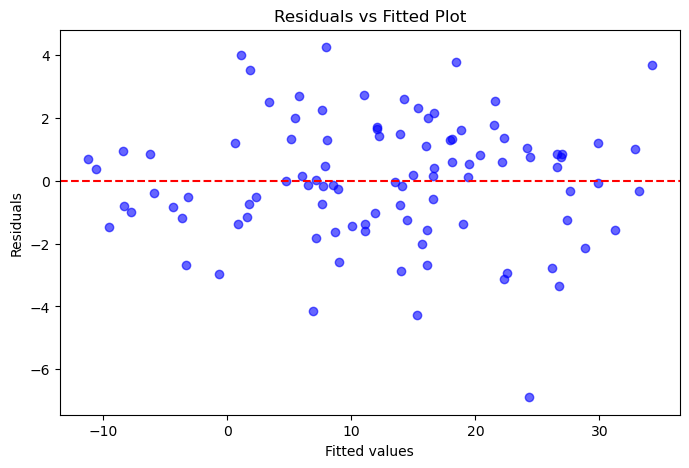

In [10]:
import matplotlib.pyplot as plt

# Residuals vs Fitted
plt.figure(figsize=(8,5))
plt.scatter(fitted_gd, residuals_gd, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Plot")
plt.show()


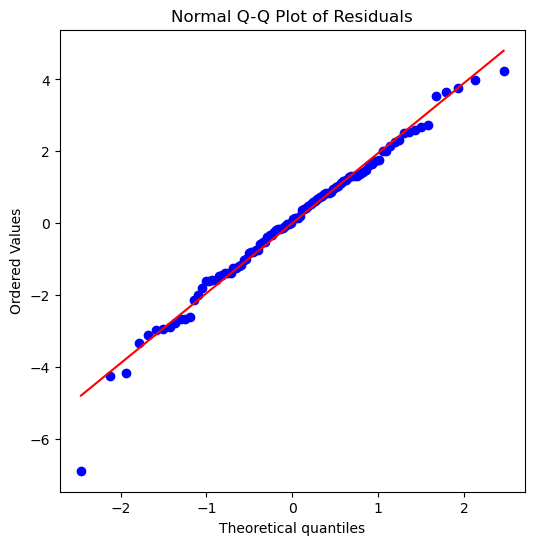

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(residuals_gd.flatten(), dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()


In [12]:
from scipy.stats import shapiro, kstest, anderson, norm

residuals_flat = residuals_gd.flatten()  # flatten residuals

# 1️⃣ Shapiro-Wilk Test
stat_sw, p_sw = shapiro(residuals_flat)
print("Shapiro-Wilk test statistic:", stat_sw)
print("Shapiro-Wilk p-value:", p_sw)
if p_sw > 0.05:
    print("Shapiro-Wilk: Fail to reject H0 → residuals approximately normal")
else:
    print("Shapiro-Wilk: Reject H0 → residuals NOT normal")
print("-"*50)

# 2️⃣ Kolmogorov-Smirnov Test
# K-S test requires standardized residuals
res_std = (residuals_flat - np.mean(residuals_flat)) / np.std(residuals_flat, ddof=1)
stat_ks, p_ks = kstest(res_std, 'norm')
print("Kolmogorov-Smirnov test statistic:", stat_ks)
print("Kolmogorov-Smirnov p-value:", p_ks)
if p_ks > 0.05:
    print("K-S: Fail to reject H0 → residuals approximately normal")
else:
    print("K-S: Reject H0 → residuals NOT normal")
print("-"*50)

# 3️⃣ Anderson-Darling Test
result_ad = anderson(residuals_flat, dist='norm')
print("Anderson-Darling statistic:", result_ad.statistic)
for sl, cv in zip(result_ad.significance_level, result_ad.critical_values):
    if result_ad.statistic < cv:
        conclusion = "Fail to reject H0 → residuals approximately normal"
    else:
        conclusion = "Reject H0 → residuals NOT normal"
    print(f"Significance level {sl}%: critical value {cv:.4f}, conclusion: {conclusion}")


Shapiro-Wilk test statistic: 0.9849683606130436
Shapiro-Wilk p-value: 0.3159280333862462
Shapiro-Wilk: Fail to reject H0 → residuals approximately normal
--------------------------------------------------
Kolmogorov-Smirnov test statistic: 0.05173916777324558
Kolmogorov-Smirnov p-value: 0.9389770539933334
K-S: Fail to reject H0 → residuals approximately normal
--------------------------------------------------
Anderson-Darling statistic: 0.2617367993629358
Significance level 15.0%: critical value 0.5550, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 10.0%: critical value 0.6320, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 5.0%: critical value 0.7590, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 2.5%: critical value 0.8850, conclusion: Fail to reject H0 → residuals approximately normal
Significance level 1.0%: critical value 1.0530, conclusion: Fail to reject H0 → residuals app

In [13]:
from scipy.stats import ttest_1samp

# Flatten residuals
residuals_flat = residuals_gd.flatten()

# One-sample t-test against 0
t_stat, p_value = ttest_1samp(residuals_flat, 0)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("Fail to reject H0 → residuals have mean approximately zero")
else:
    print("Reject H0 → residuals have mean significantly different from zero")


t-statistic: 0.0051620928578741156
p-value: 0.9958916518342096
Fail to reject H0 → residuals have mean approximately zero


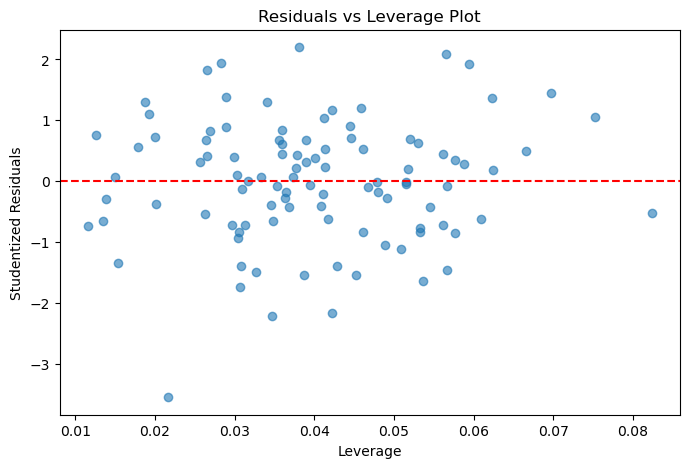

High leverage cutoff: 0.0800
High leverage points (indices): [90]


In [14]:
import matplotlib.pyplot as plt

# Design matrix (with intercept)
X = model_gd.X
n, p_plus1 = X.shape  # p_plus1 includes intercept

# Hat matrix H
H = X @ np.linalg.inv(X.T @ X) @ X.T
leverage = np.diag(H)

# Studentized residuals
studentized_residuals = residuals_gd.flatten() / (model_gd.RSE * np.sqrt(1 - leverage))

# Plot Residuals vs Leverage
plt.figure(figsize=(8,5))
plt.scatter(leverage, studentized_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Residuals vs Leverage Plot")
plt.show()

# Optional: identify high leverage points
high_leverage_cutoff = 2 * p_plus1 / n
print(f"High leverage cutoff: {high_leverage_cutoff:.4f}")
high_leverage_points = np.where(leverage > high_leverage_cutoff)[0]
print("High leverage points (indices):", high_leverage_points)


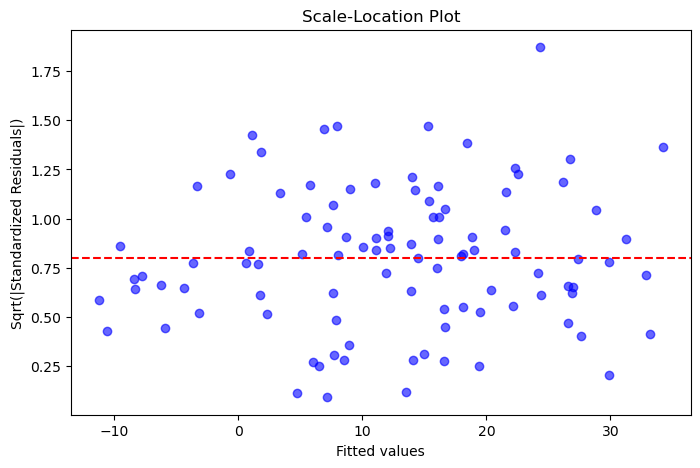

In [15]:
import matplotlib.pyplot as plt

# Standardized residuals
std_resid = residuals_gd.flatten() / model_gd.RSE

# Square root of absolute standardized residuals
sqrt_std_resid = np.sqrt(np.abs(std_resid))

# Plot
plt.figure(figsize=(8,5))
plt.scatter(fitted_gd, sqrt_std_resid, alpha=0.6, color='blue')
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|Standardized Residuals|)")
plt.title("Scale-Location Plot")
plt.axhline(np.mean(sqrt_std_resid), color='red', linestyle='--')
plt.show()


In [16]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit OLS using statsmodels to use BP test
X_sm = sm.add_constant(X)  # add intercept
ols_model = sm.OLS(Y, X_sm).fit()

# Breusch-Pagan test
bp_test = het_breuschpagan(ols_model.resid, ols_model.model.exog)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print("Breusch-Pagan test LM statistic:", lm_stat)
print("Breusch-Pagan test LM p-value:", lm_pvalue)
print("Breusch-Pagan test F-statistic:", f_stat)
print("Breusch-Pagan test F p-value:", f_pvalue)

# Interpretation
if lm_pvalue > 0.05:
    print("Fail to reject H0 → residuals are homoscedastic")
else:
    print("Reject H0 → residuals are heteroscedastic")


Breusch-Pagan test LM statistic: 6.0452403840238205
Breusch-Pagan test LM p-value: 0.10942980760216892
Breusch-Pagan test F-statistic: 2.05894510378661
Breusch-Pagan test F p-value: 0.11077955851090418
Fail to reject H0 → residuals are homoscedastic


In [17]:
from statsmodels.stats.stattools import durbin_watson

# Flatten residuals
residuals_flat = residuals_gd.flatten()

# Durbin-Watson test
dw_stat = durbin_watson(residuals_flat)
print("Durbin-Watson statistic:", dw_stat)

# Interpretation
if 1.5 <= dw_stat <= 2.5:
    print("DW ≈ 2 → little to no autocorrelation in residuals")
elif dw_stat < 1.5:
    print("DW < 2 → positive autocorrelation detected")
else:
    print("DW > 2 → negative autocorrelation detected")


Durbin-Watson statistic: 2.375945299520026
DW ≈ 2 → little to no autocorrelation in residuals


In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=10.0):
    """
    Iteratively remove predictors with VIF > thresh
    """
    X = pd.DataFrame(X)
    while True:
        vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            max_idx = vif.index(max_vif)
            print(f"Dropping X{max_idx} with VIF={max_vif:.2f}")
            X = X.drop(X.columns[max_idx], axis=1)
        else:
            break
    return X, vif

# Example usage
X_final, vif_final = calculate_vif(X[:,1:], thresh=5)  # exclude intercept
print("Remaining predictors after VIF check:", X_final.columns)


Remaining predictors after VIF check: RangeIndex(start=0, stop=3, step=1)


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro, kstest, anderson, ttest_1samp, norm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

class RegressionDiagnostics:
    def __init__(self, X, Y, fitted, residuals, add_intercept=True):
        """
        X: original predictor matrix (without intercept)
        Y: response vector
        fitted: fitted values
        residuals: residuals (Y - fitted)
        """
        self.X = np.array(X)
        self.Y = np.array(Y).reshape(-1,1)
        self.fitted = np.array(fitted).reshape(-1,1)
        self.residuals = np.array(residuals).reshape(-1,1)
        self.n = self.Y.shape[0]
        self.add_intercept = add_intercept
        self.p = self.X.shape[1]
        if add_intercept:
            self.X_with_intercept = np.column_stack((np.ones(self.n), self.X))
        else:
            self.X_with_intercept = self.X

    def residuals_vs_fitted(self):
        plt.figure(figsize=(7,5))
        plt.scatter(self.fitted, self.residuals, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Fitted values")
        plt.ylabel("Residuals")
        plt.title("Residuals vs Fitted")
        plt.show()

    def qq_plot(self):
        plt.figure(figsize=(6,6))
        sm.qqplot(self.residuals.flatten(), line='45', fit=True)
        plt.title("Normal Q-Q Plot of Residuals")
        plt.show()

    def normality_tests(self):
        r = self.residuals.flatten()
        print("=== Normality Tests ===")
        # Shapiro-Wilk
        stat_sw, p_sw = shapiro(r)
        print(f"Shapiro-Wilk: stat={stat_sw:.4f}, p={p_sw:.4f} → {'normal' if p_sw>0.05 else 'NOT normal'}")
        # Kolmogorov-Smirnov
        r_std = (r - np.mean(r)) / np.std(r, ddof=1)
        stat_ks, p_ks = kstest(r_std, 'norm')
        print(f"Kolmogorov-Smirnov: stat={stat_ks:.4f}, p={p_ks:.4f} → {'normal' if p_ks>0.05 else 'NOT normal'}")
        # Anderson-Darling
        result_ad = anderson(r, dist='norm')
        print(f"Anderson-Darling statistic: {result_ad.statistic:.4f}")
        for sl, cv in zip(result_ad.significance_level, result_ad.critical_values):
            conclusion = "normal" if result_ad.statistic < cv else "NOT normal"
            print(f"  Significance {sl}%: critical={cv:.4f}, conclusion: {conclusion}")

    def mean_residual_test(self):
        r = self.residuals.flatten()
        t_stat, p_val = ttest_1samp(r, 0)
        print("=== Mean of Residuals Test ===")
        print(f"t-statistic: {t_stat:.4f}, p-value: {p_val:.4f} → {'mean ~ 0' if p_val>0.05 else 'mean != 0'}")

    def residuals_vs_leverage(self):
        X = self.X_with_intercept
        H = X @ np.linalg.pinv(X.T @ X) @ X.T
        leverage = np.diag(H)
        student_resid = self.residuals.flatten() / (np.std(self.residuals.flatten(), ddof=self.p+1) * np.sqrt(1 - leverage))
        plt.figure(figsize=(7,5))
        plt.scatter(leverage, student_resid, alpha=0.6)
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel("Leverage")
        plt.ylabel("Studentized Residuals")
        plt.title("Residuals vs Leverage")
        plt.show()
        cutoff = 2 * (self.p + 1) / self.n
        print(f"High leverage cutoff: {cutoff:.4f}")
        high_lev_points = np.where(leverage > cutoff)[0]
        print("High leverage points (indices):", high_lev_points)

    def scale_location_plot(self):
        std_resid = self.residuals.flatten() / np.std(self.residuals.flatten(), ddof=self.p+1)
        sqrt_std_resid = np.sqrt(np.abs(std_resid))
        plt.figure(figsize=(7,5))
        plt.scatter(self.fitted, sqrt_std_resid, alpha=0.6)
        plt.axhline(np.mean(sqrt_std_resid), color='red', linestyle='--')
        plt.xlabel("Fitted values")
        plt.ylabel("Sqrt(|Standardized Residuals|)")
        plt.title("Scale-Location Plot")
        plt.show()

    def heteroskedasticity_test(self):
        model = sm.OLS(self.Y, self.X_with_intercept).fit()
        bp_test = het_breuschpagan(model.resid, model.model.exog)
        lm_stat, lm_p, f_stat, f_p = bp_test
        print("=== Breusch-Pagan Test ===")
        print(f"LM statistic={lm_stat:.4f}, p-value={lm_p:.4f} → {'homoscedastic' if lm_p>0.05 else 'heteroscedastic'}")

    def autocorrelation_test(self):
        dw_stat = durbin_watson(self.residuals.flatten())
        print("=== Durbin-Watson Test ===")
        print(f"DW statistic={dw_stat:.4f} → ", end='')
        if 1.5 <= dw_stat <= 2.5:
            print("little to no autocorrelation")
        elif dw_stat < 1.5:
            print("positive autocorrelation detected")
        else:
            print("negative autocorrelation detected")

    def vif_check(self, thresh=5.0):
        X_vif = pd.DataFrame(self.X)
        print("=== Variance Inflation Factor (VIF) ===")
        for i in range(X_vif.shape[1]):
            vif = variance_inflation_factor(X_vif.values, i)
            print(f"X{i+1}: VIF={vif:.4f} → {'OK' if vif<=thresh else 'High'}")

    def run_all(self):
        self.residuals_vs_fitted()
        self.qq_plot()
        self.normality_tests()
        self.mean_residual_test()
        self.residuals_vs_leverage()
        self.scale_location_plot()
        self.heteroskedasticity_test()
        self.autocorrelation_test()
        self.vif_check()


In [23]:
# Create diagnostics object
diag = RegressionDiagnostics(X, Y, fitted_gd, residuals_gd)
# diag.run_all()

**Tests**
* Shapiro-Wilk → tests normality of residuals
* Kolmogorov-Smirnov (K-S) → tests residuals against normal distribution
* Anderson-Darling → more sensitive normality test, especially in tails
* Breusch-Pagan → tests for heteroskedasticity (non-constant variance)
* Durbin-Watson → tests autocorrelation of residuals
* Variance Inflation Factor (VIF) → checks multicollinearity among predictors

**Plots**
 * Residuals vs Fitted plot
 * Q-Q plot
 * Residuals vs Leverage
 * Scale-Location plot

In [24]:
import numpy as np

# Step 0: Define X and Y
X = np.array([
    [1, 1, 2, 0, 1],  # intercept + 4 predictors
    [1, 2, 0, 1, 0],
    [1, 3, 1, 2, 1],
    [1, 4, 3, 1, 0],
    [1, 5, 2, 3, 1]
], dtype=float)

Y = np.array([10, 12, 15, 20, 18], dtype=float).reshape(-1,1)

print("X (Design matrix):")
print(X)
print("\nY (Response vector):")
print(Y)

# Step 1: Compute X^T X
XtX = X.T @ X
print("\nStep 1: X^T X (Gram matrix):")
print(XtX)

# Step 2: Compute X^T Y
XtY = X.T @ Y
print("\nStep 2: X^T Y:")
print(XtY)

# Step 3: Compute inverse of X^T X
XtX_inv = np.linalg.inv(XtX)
print("\nStep 3: (X^T X)^-1:")
print(XtX_inv)

# Step 4: Compute beta_hat
beta_hat = XtX_inv @ XtY
print("\nStep 4: Estimated coefficients (beta_hat):")
print(beta_hat)


X (Design matrix):
[[1. 1. 2. 0. 1.]
 [1. 2. 0. 1. 0.]
 [1. 3. 1. 2. 1.]
 [1. 4. 3. 1. 0.]
 [1. 5. 2. 3. 1.]]

Y (Response vector):
[[10.]
 [12.]
 [15.]
 [20.]
 [18.]]

Step 1: X^T X (Gram matrix):
[[ 5. 15.  8.  7.  3.]
 [15. 55. 27. 27.  9.]
 [ 8. 27. 18. 11.  5.]
 [ 7. 27. 11. 15.  5.]
 [ 3.  9.  5.  5.  3.]]

Step 2: X^T Y:
[[ 75.]
 [249.]
 [131.]
 [116.]
 [ 43.]]

Step 3: (X^T X)^-1:
[[-1.26077333e+15  1.89116000e+15 -1.26077333e+15 -2.52154667e+15
   1.89116000e+15]
 [ 1.89116000e+15 -2.83674000e+15  1.89116000e+15  3.78232000e+15
  -2.83674000e+15]
 [-1.26077333e+15  1.89116000e+15 -1.26077333e+15 -2.52154667e+15
   1.89116000e+15]
 [-2.52154667e+15  3.78232000e+15 -2.52154667e+15 -5.04309333e+15
   3.78232000e+15]
 [ 1.89116000e+15 -2.83674000e+15  1.89116000e+15  3.78232000e+15
  -2.83674000e+15]]

Step 4: Estimated coefficients (beta_hat):
[[ 124.  ]
 [-149.5 ]
 [  47.75]
 [  53.  ]
 [ -21.  ]]
